In [0]:
import sys
import pandas as pd
import gdown
import os
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [56]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
df=pd.read_csv('/content/drive/Shared drives/Project_256/Complete_Data.csv')

In [58]:
df.head()

text_reviews_count country_code  ... n_comments     authorid
0                   1           US  ...          0  ['8551671']
1                   2           US  ...          0  ['3274315']
2                   5           US  ...          0    ['37450']
3                   5           US  ...          0    ['37450']
4                   5           US  ...          0    ['37450']

[5 rows x 25 columns]

In [59]:
len(df)

542338

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542338 entries, 0 to 542337
Data columns (total 25 columns):
text_reviews_count      542338 non-null int64
country_code            542338 non-null object
language_code           440941 non-null object
popular_shelves         542338 non-null object
is_ebook                542338 non-null bool
average_rating          542338 non-null float64
description             503862 non-null object
authors                 542338 non-null object
publication_year        480268 non-null float64
book_id                 542338 non-null int64
ratings_count           542338 non-null int64
title                   542338 non-null object
title_without_series    542338 non-null object
user_id                 542338 non-null object
review_id               542338 non-null object
is_read                 542338 non-null bool
rating                  542338 non-null int64
date_added              542338 non-null object
date_updated            542338 non-null object
re

In [61]:
df.isnull().sum()

text_reviews_count           0
country_code                 0
language_code           101397
popular_shelves              0
is_ebook                     0
average_rating               0
description              38476
authors                      0
publication_year         62070
book_id                      0
ratings_count                0
title                        0
title_without_series         0
user_id                      0
review_id                    0
is_read                      0
rating                       0
date_added                   0
date_updated                 0
read_at                  73274
started_at              227967
review_text                323
n_votes                      0
n_comments                   0
authorid                     0
dtype: int64

In [0]:
data = df[['user_id', 'book_id', 'date_added', 'title']]
data['book_id']= data['book_id'].astype(str)

In [63]:
data.head()

user_id   book_id                      date_added
0  f1830550c10246b9924d03fbb7858a3b  25742454  Wed Jun 15 16:38:58 -0700 2016
1  4867af4dbac45448491c46b43363f240  30128855  Sun Aug 14 09:49:50 -0700 2016
2  568ce0dddc00192a814476ab5441acbb  13571772  Thu Sep 11 05:22:01 -0700 2014
3  ae681bb05174eaa3d2124d51262b76ad  13571772  Mon Oct 08 05:05:03 -0700 2012
4  396fe0f07a53ad6be40e232c28a35e18  13571772  Wed Nov 21 18:49:31 -0800 2012

In [0]:
import dateutil
data['date_added'] = data['date_added'].apply(dateutil.parser.parse, ignoretz=True)

In [65]:
data.head()

user_id   book_id          date_added
0  f1830550c10246b9924d03fbb7858a3b  25742454 2016-06-15 16:38:58
1  4867af4dbac45448491c46b43363f240  30128855 2016-08-14 09:49:50
2  568ce0dddc00192a814476ab5441acbb  13571772 2014-09-11 05:22:01
3  ae681bb05174eaa3d2124d51262b76ad  13571772 2012-10-08 05:05:03
4  396fe0f07a53ad6be40e232c28a35e18  13571772 2012-11-21 18:49:31

In [66]:

users = data["user_id"].unique().tolist()
len(users)

59347

In [67]:
print(users)

['f1830550c10246b9924d03fbb7858a3b', '4867af4dbac45448491c46b43363f240', '568ce0dddc00192a814476ab5441acbb', 'ae681bb05174eaa3d2124d51262b76ad', '396fe0f07a53ad6be40e232c28a35e18', '1c0124b7ccfd549911ad5c8741d95765', '79423049f862e94f1022f736a3c22cc1', '0dca3d40440078319639dfda884655dd', '7d1157b5ca717aa3ce1c5acba93a0ead', 'aff0f604cdd5ccf607ead1db1c580a4d', 'd178bda7a128ff3a5c3d74f362b67225', '5368cd0724fab779b0676e5fe8bdd285', '1aba08eadc1d3a9a322843b1516b37af', '95747ce50cc18813cb46051365c04de9', 'afd0db024cc68980bb6fd6bdaaf5fa25', 'c9b724a75f3bdf9b2c7379478d772938', 'e38d0a36d72f308344b4e95dd5664137', 'e7fec4c1585427f4f18c1fe4ab0978a6', '4accbe7f548fb868a1624532f7e6770c', 'c2fa50d7ed130cbdf651290d9f1a90c3', '795595616d3dbd81bd16b617c9a1fa48', 'a8fc3c91ad1d4ff02c12f4b9d2193b63', '50e2ef79c502ae6e28c056eb1c9f9d89', '5037e6167bc3846a15d3e0a43f3656c1', '73065a1c52acb6f41e80a1f219263a3a', '9b2b795d341296aace117f74ef31896d', '997c4810e3a16bcad347c6455d1625e5', '3dd563312fdc93283bd449a9d6

In [68]:
import random
random.shuffle(users)

# extract 90% of customer ID's
user_train = [users[i] for i in range(round(0.9*len(users)))]
len(user_train)


53412

In [69]:
print(user_train)
print(data['user_id'].isin(user_train))

['4755b5eb98158c9af807b77f030bf569', '50db2517ed5f937c637b512e2133f9c3', '554befd962e14f9b245301732cfc437e', '20519bfb95b4f422851ee52de9161d34', '21ce3be3b0a64e8823b669779e31d720', '040e02a29148d0fcda6a52647dfd2c03', 'c86930dd67a48821354c636a98ceabcc', '7df1e3a6d5b7fd66d88ee82eb3061a09', '04abbb73a9f9f6711c6de98200e0dfd5', '5ddb20a0a60afb6bcd609d46959140ae', '997c6456fc247f2da12e3d7c6732848b', '40527a875cb6001acb6fbdd0dc5adbd8', 'd85c2e301038b29066b1e93b4b5582b6', '233e1cf78210b8e627cd6b314e98e0ec', '145edcca6064c58cf9cd52554e65fb6a', '1795511d0d7de0b412d54c96faa74849', '86aabc76b7ba3fdb5ef3661e77d9328a', 'e8912dcd4ede906ea2e81a26bfa0831c', '5fed050b458c0f315ccac1921bb95b75', 'dc4d8a28fd6764a52a20b50ccdc0b150', '0cf3292f5b26dafd0ad220714ece6280', 'dd8d1e2542dd8f5e27d7e43a123a193d', 'ca566f92759a00c6760da698002209b7', '2d1066ef5eb3f0c6f224606123c25d8e', '352f31141b471caf74b8065f53789741', 'b3571369f5778a5597b0b741a034d579', '9edd693eb79306b2cf922b67c1568078', '262c542a1d928c8750be5a113f

In [70]:
# split data into train and validation set
train_df = data[data['user_id'].isin(user_train)]
print(train_df)


                                 user_id   book_id          date_added
0       f1830550c10246b9924d03fbb7858a3b  25742454 2016-06-15 16:38:58
1       4867af4dbac45448491c46b43363f240  30128855 2016-08-14 09:49:50
2       568ce0dddc00192a814476ab5441acbb  13571772 2014-09-11 05:22:01
3       ae681bb05174eaa3d2124d51262b76ad  13571772 2012-10-08 05:05:03
6       79423049f862e94f1022f736a3c22cc1    707611 2016-01-07 00:32:16
...                                  ...       ...                 ...
542332  a481a3707402dd01acba464ce3266462  20653416 2016-12-06 06:13:05
542333  eeb8f2342614357e60d24888542e1bcb  20653416 2017-06-07 04:35:21
542334  f9816720483c9e0ffc90a3a9fea2423a  28928706 2016-02-05 14:04:00
542336  d6e0a0ad9a3194ce99025b5d234a7c15  23363286 2016-04-06 14:28:34
542337  2e6924186dcf859659a56c65c93d77ed  23363286 2015-08-23 12:52:56

[485509 rows x 3 columns]


In [71]:
validation_df = data[~data['user_id'].isin(user_train)]
print(validation_df)

                                 user_id   book_id          date_added
4       396fe0f07a53ad6be40e232c28a35e18  13571772 2012-11-21 18:49:31
5       1c0124b7ccfd549911ad5c8741d95765  35452242 2017-09-27 11:42:25
16      c9b724a75f3bdf9b2c7379478d772938  27036538 2017-07-31 17:04:01
27      c9b724a75f3bdf9b2c7379478d772938  11827783 2012-06-15 13:46:52
44      8444ed5f25c636065370da187e76f8e5   2168737 2010-06-12 17:31:28
...                                  ...       ...                 ...
542311  a2ccb1614eb218c078b6cfa55e8745bb  10644600 2011-10-28 06:52:30
542319  477c709d0c9d2d1e1ff85327c311c0a5  10644600 2014-07-08 18:56:08
542320  1e875b7427755ce7747cc203f1e44362  10644600 2011-09-04 09:55:00
542328  5955ae7025ad3fc9c3933ece83d1cca1  30848889 2017-01-03 21:57:55
542335  7837116a9fb91357adcf1105d2c76a8d  28928706 2017-04-25 11:03:11

[56829 rows x 3 columns]


In [72]:
train_df.groupby(['user_id']).groups.keys()

dict_keys(['00009e46d18f223a82b22da38586b605', '000192962b87d560f00b06fdcbd71681', '0003a8eb2989503d03ad7ca701898a48', '0005a08accd53b1e19c52109a1f478cb', '0006260f85929db85eddee3a0bd0e504', '000700ecd5db3a9b0c4e392ed2e4f70b', '0008931c0cde961e9c802c5a58196d23', '0008e72711d978c23e3aa3bc7ba3871c', '0009a508d8e285fd3e691d1e9be8a7c5', '000a9539c044b397780166167b1327b3', '000b9da55af4420915d408f205919d29', '000c08303ab122db5baf96607bd55054', '000efb30c5236d7437c3cdf4bf3e4dc7', '001010815d3b2692435dfc70285d06e4', '0010d01657baa40ca36423a621229aac', '00125c81ba9ef0504bd02697fdbc3827', '0017507d4413a03fbfa5848972658206', '0019be35f5c9e0ea5cb8263aba085de4', '0019de4561419b7543238e0979f2f33e', '0019e891665331a2d57eceda5f73cc43', '001eb567b3331c3ef3291a801d31be4a', '001fe7f0764b346e745bb879fa834717', '0021dcf35bb8ddb3e5754779b3a7d690', '0021e047a599f9827d75628db22097b6', '00241d48108098f09c1769866aace81d', '00254cd48d3d8a99ca9f0ed44fa69d5f', '00268e2e7b05159626c6dfff078aa795', '00271d2abc3a798e

In [116]:
train_df[train_df.user_id == 'bd53fcba9dbb9ca1d2ca1551b44007e7'	]

user_id   book_id          date_added
14948   bd53fcba9dbb9ca1d2ca1551b44007e7  25233412 2015-08-26 15:14:59
25142   bd53fcba9dbb9ca1d2ca1551b44007e7  15704307 2016-03-30 13:21:20
32649   bd53fcba9dbb9ca1d2ca1551b44007e7  22878114 2015-08-26 16:05:46
32977   bd53fcba9dbb9ca1d2ca1551b44007e7  22731045 2016-07-04 16:40:35
34518   bd53fcba9dbb9ca1d2ca1551b44007e7     30069 2016-04-25 17:06:31
38529   bd53fcba9dbb9ca1d2ca1551b44007e7  24172999 2016-07-04 18:17:06
51335   bd53fcba9dbb9ca1d2ca1551b44007e7     15195 2015-12-01 15:09:18
61418   bd53fcba9dbb9ca1d2ca1551b44007e7    744615 2015-01-11 08:17:49
70343   bd53fcba9dbb9ca1d2ca1551b44007e7   7904429 2016-01-08 13:34:25
75158   bd53fcba9dbb9ca1d2ca1551b44007e7  14498307 2015-07-14 17:56:35
76007   bd53fcba9dbb9ca1d2ca1551b44007e7  24173041 2016-07-04 20:00:59
80266   bd53fcba9dbb9ca1d2ca1551b44007e7  26810301 2016-10-23 08:48:36
110097  bd53fcba9dbb9ca1d2ca1551b44007e7  25088157 2015-08-26 13:55:46
128744  bd53fcba9dbb9ca1d2ca1551b44007e7  17348705 2015-07-14 17:57:34
147894  bd53fcba9dbb9ca1d2ca1551b44007e7  25233409 2015-08-26 14:52:34
147923  bd53fcba9dbb9ca1d2ca1551b44007e7  25233408 2015-08-26 14:24:57
164718  bd53fcba9dbb9ca1d2ca1551b44007e7  26762149 2016-10-08 18:46:04
169766  bd53fcba9dbb9ca1d2ca1551b44007e7  24172883 2016-07-04 16:49:39
186038  bd53fcba9dbb9ca1d2ca1551b44007e7  28674244 2016-02-08 12:42:46
189007  bd53fcba9dbb9ca1d2ca1551b44007e7  19351043 2016-01-10 10:38:45
194507  bd53fcba9dbb9ca1d2ca1551b44007e7  25233663 2015-08-26 16:40:42
205322  bd53fcba9dbb9ca1d2ca1551b44007e7  31425149 2017-08-17 10:38:00
206532  bd53fcba9dbb9ca1d2ca1551b44007e7  18528141 2016-01-03 07:54:01
208082  bd53fcba9dbb9ca1d2ca1551b44007e7    138398 2015-07-14 17:58:32
208820  bd53fcba9dbb9ca1d2ca1551b44007e7    138396 2016-04-21 18:16:06
209127  bd53fcba9dbb9ca1d2ca1551b44007e7    138397 2016-05-22 20:15:13
222218  bd53fcba9dbb9ca1d2ca1551b44007e7    835491 2016-03-30 13:21:47
222564  bd53fcba9dbb9ca1d2ca1551b44007e7  17465574 2015-10-08 15:04:09
295119  bd53fcba9dbb9ca1d2ca1551b44007e7   8618110 2015-10-21 07:20:49
301978  bd53fcba9dbb9ca1d2ca1551b44007e7     13618 2016-06-29 07:29:57
302176  bd53fcba9dbb9ca1d2ca1551b44007e7     13619 2016-01-17 21:12:37
302692  bd53fcba9dbb9ca1d2ca1551b44007e7     13615 2016-01-10 11:24:48
303092  bd53fcba9dbb9ca1d2ca1551b44007e7     13616 2016-07-03 07:52:01
303236  bd53fcba9dbb9ca1d2ca1551b44007e7     13617 2016-09-24 12:35:24
304901  bd53fcba9dbb9ca1d2ca1551b44007e7  25229189 2015-08-26 14:12:08
310029  bd53fcba9dbb9ca1d2ca1551b44007e7  24172952 2016-07-04 17:33:34
332607  bd53fcba9dbb9ca1d2ca1551b44007e7  16074588 2015-07-14 17:56:56
332923  bd53fcba9dbb9ca1d2ca1551b44007e7  24173066 2016-07-04 20:11:19
335229  bd53fcba9dbb9ca1d2ca1551b44007e7   5989573 2016-01-06 13:04:15
342939  bd53fcba9dbb9ca1d2ca1551b44007e7  25162725 2015-08-26 16:52:39
347599  bd53fcba9dbb9ca1d2ca1551b44007e7  25934319 2016-10-08 17:58:00
347620  bd53fcba9dbb9ca1d2ca1551b44007e7  25934313 2016-10-08 17:13:21
351074  bd53fcba9dbb9ca1d2ca1551b44007e7  23257773 2015-08-30 10:41:40
383900  bd53fcba9dbb9ca1d2ca1551b44007e7  21412023 2015-10-03 07:44:42
397803  bd53fcba9dbb9ca1d2ca1551b44007e7  25934317 2016-10-08 17:56:38
400770  bd53fcba9dbb9ca1d2ca1551b44007e7  17131869 2016-03-30 13:21:29
423436  bd53fcba9dbb9ca1d2ca1551b44007e7  25233413 2015-08-26 16:39:52
424792  bd53fcba9dbb9ca1d2ca1551b44007e7  16074607 2016-01-10 13:54:39
453076  bd53fcba9dbb9ca1d2ca1551b44007e7     13621 2016-12-31 04:46:04
453195  bd53fcba9dbb9ca1d2ca1551b44007e7     13620 2016-12-30 11:59:14
462432  bd53fcba9dbb9ca1d2ca1551b44007e7     29800 2015-01-10 14:17:15
462919  bd53fcba9dbb9ca1d2ca1551b44007e7     29801 2015-01-11 08:15:22
463193  bd53fcba9dbb9ca1d2ca1551b44007e7     29802 2015-01-11 08:17:43
469406  bd53fcba9dbb9ca1d2ca1551b44007e7  25213237 2016-10-08 16:57:03
472810  bd53fcba9dbb9ca1d2ca1551b44007e7  25934322 2016-10-08 18:11:11
483387  bd53fcba9dbb9ca1d2ca1551b44007e7  25785993 2016-1

In [74]:
train_df.groupby('user_id')['book_id'].count()

user_id
00009e46d18f223a82b22da38586b605    1
000192962b87d560f00b06fdcbd71681    1
0003a8eb2989503d03ad7ca701898a48    3
0005a08accd53b1e19c52109a1f478cb    5
0006260f85929db85eddee3a0bd0e504    8
                                   ..
fffe3fca0160bd78ae5828b44fbeb72d    1
ffff601c0ffa34bd5ffbbf2caee30644    3
ffff7cafdaf5196383cb2efca08fb6fe    9
ffffbb062a8b208c9c1031b529c08f7a    2
fffff8a718843c0e11dfd93fb41c1297    2
Name: book_id, Length: 53412, dtype: int64

In [0]:
grouped = train_df.groupby(['user_id'],as_index=False).apply(lambda x: x.sort_values(["date_added"], ascending = True))


In [76]:
type(grouped)

pandas.core.frame.DataFrame

In [77]:
grouped.head(100)

user_id   book_id          date_added
0  523791  00009e46d18f223a82b22da38586b605  23546829 2016-01-04 09:57:17
1  241484  000192962b87d560f00b06fdcbd71681  30025791 2017-01-28 09:21:29
2  32130   0003a8eb2989503d03ad7ca701898a48  23479604 2015-05-29 07:59:10
   358764  0003a8eb2989503d03ad7ca701898a48  15780398 2015-05-29 08:01:01
   296106  0003a8eb2989503d03ad7ca701898a48  22738008 2015-05-29 08:02:16
...                                     ...       ...                 ...
18 135168  0019de4561419b7543238e0979f2f33e   6657541 2015-12-26 22:41:46
   451763  0019de4561419b7543238e0979f2f33e     98413 2015-12-29 11:53:23
   71304   0019de4561419b7543238e0979f2f33e    357399 2016-01-26 18:43:13
   330713  0019de4561419b7543238e0979f2f33e  22554204 2016-06-24 16:08:58
   451844  0019de4561419b7543238e0979f2f33e     98411 2016-06-26 14:56:05

[100 rows x 3 columns]

In [0]:
reading_history = grouped.groupby('user_id')['book_id'].apply(list).reset_index()



In [79]:
type(reading_history)

pandas.core.frame.DataFrame

In [80]:
reading_list = reading_history['book_id'].tolist()
print(reading_list[2])

['23479604', '15780398', '22738008']


In [81]:

# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(reading_list, progress_per=200)

model.train(reading_list, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(3724283, 4855090)

In [0]:
# save word2vec model
model.save("word2vec_2.model")

In [0]:
model.init_sims(replace=True)

In [84]:
print(model)

Word2Vec(vocab=17320, size=100, alpha=0.03)


In [85]:
# extract all vectors
X = model[model.wv.vocab]

X.shape

(17320, 100)

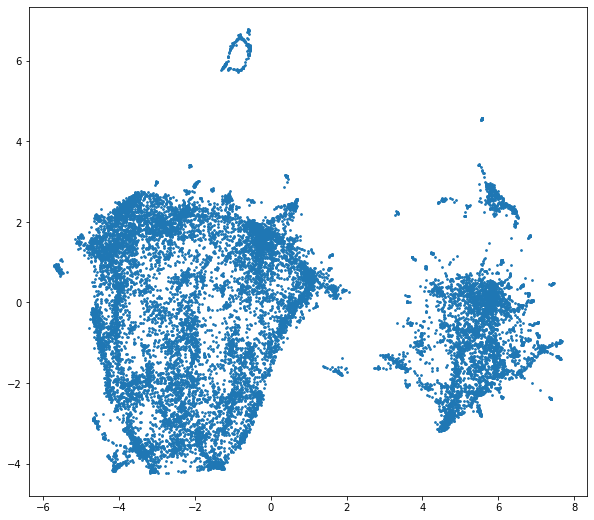

In [86]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [0]:
books = df[['book_id', 'title']]
books['book_id']= books['book_id'].astype(str)
# remove duplicates
books.drop_duplicates(inplace=True, subset='book_id', keep="last")

# create product-ID and product-description dictionary
books_dict = books.groupby('book_id')['title'].apply(list).to_dict()

In [107]:
books_dict['22731045']

['Adventure Time: Banana Guard Academy #1']

In [105]:
print(books_dict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
def similar_products(v, n = 20):
    
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (books_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms

In [115]:
train_df[train_df.book_id == '22731045'	]

user_id   book_id          date_added
32977  bd53fcba9dbb9ca1d2ca1551b44007e7  22731045 2016-07-04 16:40:35

In [118]:
books_dict['25233412']

['Lumberjanes #6']

In [120]:
similar_products(model['25233412'])

[('Lumberjanes #7', 0.9585328102111816),
 ('Lumberjanes #8', 0.928963303565979),
 ('Lumberjanes #5', 0.9213955402374268),
 ('Lumberjanes #9', 0.9095337986946106),
 ('Lumberjanes #10', 0.8939235210418701),
 ('Lumberjanes #4', 0.8852756023406982),
 ('Mars Girls', 0.8596073389053345),
 ('Bee and Puppycat #1', 0.8534953594207764),
 ('Lumberjanes #3', 0.846779465675354),
 ('Lumberjanes #11', 0.8452142477035522),
 ('Lumberjanes #2', 0.8432221412658691),
 ('Lumberjanes #12', 0.8329509496688843),
 ('Lumberjanes #13', 0.8293249011039734),
 ('Lumberjanes #14', 0.8175989985466003),
 ('Saga #25', 0.8149051666259766),
 ('Lumberjanes #15', 0.8122511506080627),
 ("Bob's Burgers", 0.7994240522384644),
 ('Lumberjanes #16', 0.7992036938667297),
 ('Giant Days #1', 0.7989766597747803),
 ('Saga #26', 0.7973922491073608)]